# Building a basic neural network / MLP with Keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd

We will use Tensforflow-backed Keras to build a neural network classifier for clothing items. The dataset is called Fashion MNIST. We will use the first 5000 images in the training set for validation

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(Xtf, ytf), (Xte, yte) = fashion_mnist.load_data()

Xv, Xtr = Xtf[:5000]/255.0, Xtf[5000:]/255.0
yv, ytr = ytf[:5000], ytf[5000:]

class_names = ['Shirt', 'Trouser', 'Jumper', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boots']

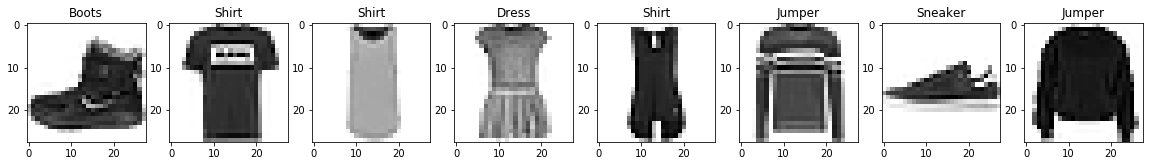

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=8, figsize=(20,20))
for i in range(8):
    axs[i].imshow(Xv[i], cmap='binary')
    axs[i].set_title(class_names[yv[i]])

We define a dense neural network with 2 hidden layers, each with 300 neurons

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


We now compile the model and train for 30 epochs

In [15]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'sgd',
    metrics=['accuracy']
)

In [16]:
history = model.fit(Xtr, ytr, epochs=30, validation_data=(Xv, yv))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7154 - accuracy: 0.7656 - val_loss: 0.5442 - val_accuracy: 0.8182
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4853 - accuracy: 0.8300 - val_loss: 0.4462 - val_accuracy: 0.8432
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4429 - accuracy: 0.8465 - val_loss: 0.4215 - val_accuracy: 0.8574
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4135 - accuracy: 0.8552 - val_loss: 0.3965 - val_accuracy: 0.8670
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3938 - accuracy: 0.8625 - val_loss: 0.3746 - val_accuracy: 0.8702
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3773 - accuracy: 0.8668 - val_loss: 0.3770 - val_accuracy: 0.8702
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3643 - accuracy: 0.8722 - val_loss: 0.3680 - val_accuracy:

As the validation performance is not too much worse than training performance, we haven't overfit that much

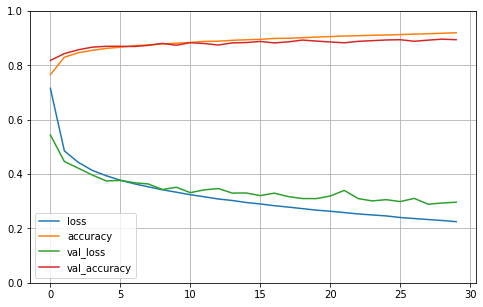

In [17]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

We reached about 85% accuracy in testing after training for 30 epochs.

In [21]:
model.evaluate(Xte, yte)

313/313 [==============================] - 0s 2ms/step - loss: 61.2724 - accuracy: 0.8486


[61.27240753173828, 0.8485999703407288]

Let's look at how we did on the first eight test images

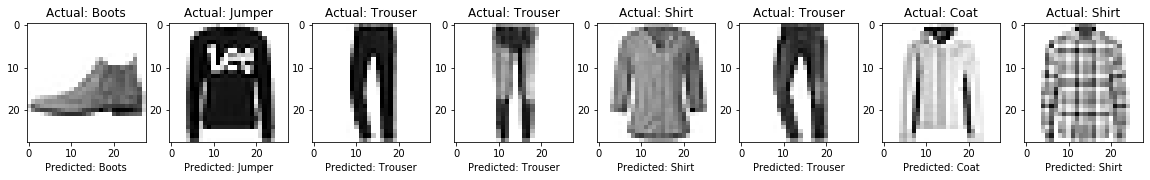

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=8, figsize=(20,20))
X = Xte[:10]
pred = np.array(class_names)[model.predict_classes(X)]
for i in range(8):
    axs[i].imshow(Xte[i], cmap='binary')
    axs[i].set_title('Actual: ' + class_names[yte[i]])
    axs[i].set_xlabel('Predicted: ' + pred[i])